In [1]:
import pandas as pd
import warnings

# Change a few settings to my liking
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 150)
warnings.filterwarnings('ignore')

In [2]:
super = pd.read_csv('superhero.csv')

In [3]:
super.head().T

,0,1,2,3,4
id,1,2,3,4,5
name,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas
intelligence,38.0,88.0,50.0,63.0,88.0
strength,100.0,28.0,90.0,80.0,63.0
speed,17.0,35.0,53.0,53.0,83.0
durability,80.0,65.0,64.0,90.0,100.0
power,24.0,100.0,99.0,62.0,100.0
combat,64.0,85.0,65.0,95.0,55.0
full-name,Richard Milhouse Jones,Abraham Sapien,NaN,Emil Blonsky,Abraxas
alter-egos,No alter egos found.,No alter egos found.,No alter egos found.,No alter egos found.,No alter egos found.


In [4]:
super.columns

Index(['id', 'name', 'intelligence', 'strength', 'speed', 'durability', 'power', 'combat', 'full-name', 'alter-egos', 'aliases', 'place-of-birth',
       'first-appearance', 'publisher', 'alignment', 'gender', 'race', 'height', 'weight', 'eye-color', 'hair-color', 'occupation', 'base',
       'group-affiliation', 'relatives', 'url'],
      dtype='object')

In [5]:
super.dtypes

id                     int64
name                  object
intelligence         float64
strength             float64
speed                float64
durability           float64
power                float64
combat               float64
full-name             object
alter-egos            object
aliases               object
place-of-birth        object
first-appearance      object
publisher             object
alignment             object
gender                object
race                  object
height                object
weight                object
eye-color             object
hair-color            object
occupation            object
base                  object
group-affiliation     object
relatives             object
url                   object
dtype: object

In [6]:
super.drop(columns=['name', 'id', 'url', 'full-name', 'alter-egos', 'place-of-birth','aliases', 'first-appearance', 'occupation', 'base', 'group-affiliation', 'relatives'], inplace=True)

In [7]:
super.head()

,intelligence,strength,speed,durability,power,combat,publisher,alignment,gender,race,height,weight,eye-color,hair-color
0,38.0,100.0,17.0,80.0,24.0,64.0,Marvel Comics,good,Male,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair
1,88.0,28.0,35.0,65.0,100.0,85.0,Dark Horse Comics,good,Male,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair
2,50.0,90.0,53.0,64.0,99.0,65.0,DC Comics,good,Male,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair
3,63.0,80.0,53.0,90.0,62.0,95.0,Marvel Comics,bad,Male,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair
4,88.0,63.0,83.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black


In [8]:
super.isnull().sum()

intelligence    165
strength        102
speed           165
durability      165
power           165
combat          165
publisher        15
alignment         0
gender            0
race            302
height            0
weight            0
eye-color         0
hair-color        0
dtype: int64

In [9]:
super.shape

(731, 14)

In [10]:
super.drop(columns = ['race'], inplace=True)

In [11]:
super.dropna(inplace=True)
super.isnull().sum().sort_values(ascending=False).head()

intelligence    0
strength        0
speed           0
durability      0
power           0
dtype: int64

In [12]:
super.shape


(555, 13)

In [13]:
# A notable data loss, but really unavoidable.

In [14]:
super.dtypes

intelligence    float64
strength        float64
speed           float64
durability      float64
power           float64
combat          float64
publisher        object
alignment        object
gender           object
height           object
weight           object
eye-color        object
hair-color       object
dtype: object

In [15]:
# Convert height from string list to numeric centimeters
super['height'] = super['height'].str.strip('[]').str.split(',').str[1].str.extract('(\d+)').astype(float)

In [16]:
# Count heroes with height of 0
(super['height'] == 0).sum()# Drop rows where height is 0
super = super[super['height'] != 0]

# Verify the new shape of the dataframe
super.shape

(451, 13)

In [17]:
# Convert weight from string list to numeric pounds
super['weight'] = super['weight'].str.strip('[]').str.split(',').str[0].str.extract('(\d+)').astype(float).round(0)

# Count heroes with weight of 0
print("Number of heroes with 0 weight:", (super['weight'] == 0).sum())

Number of heroes with 0 weight: 0


In [18]:
super.shape

(451, 13)

In [19]:
super.head()

,intelligence,strength,speed,durability,power,combat,publisher,alignment,gender,height,weight,eye-color,hair-color
0,38.0,100.0,17.0,80.0,24.0,64.0,Marvel Comics,good,Male,203.0,980.0,Yellow,No Hair
1,88.0,28.0,35.0,65.0,100.0,85.0,Dark Horse Comics,good,Male,191.0,145.0,Blue,No Hair
2,50.0,90.0,53.0,64.0,99.0,65.0,DC Comics,good,Male,185.0,200.0,Blue,No Hair
3,63.0,80.0,53.0,90.0,62.0,95.0,Marvel Comics,bad,Male,203.0,980.0,Green,No Hair
5,38.0,80.0,25.0,100.0,98.0,64.0,Marvel Comics,bad,Male,193.0,270.0,Blue,No Hair


In [20]:
# Round height and weight to whole numbers (no decimal places)
super['height'] = super['height'].round(0)
super['weight'] = super['weight'].round(0)

In [21]:
super.head()

,intelligence,strength,speed,durability,power,combat,publisher,alignment,gender,height,weight,eye-color,hair-color
0,38.0,100.0,17.0,80.0,24.0,64.0,Marvel Comics,good,Male,203.0,980.0,Yellow,No Hair
1,88.0,28.0,35.0,65.0,100.0,85.0,Dark Horse Comics,good,Male,191.0,145.0,Blue,No Hair
2,50.0,90.0,53.0,64.0,99.0,65.0,DC Comics,good,Male,185.0,200.0,Blue,No Hair
3,63.0,80.0,53.0,90.0,62.0,95.0,Marvel Comics,bad,Male,203.0,980.0,Green,No Hair
5,38.0,80.0,25.0,100.0,98.0,64.0,Marvel Comics,bad,Male,193.0,270.0,Blue,No Hair


In [22]:
super.sort_values(by='height', ascending=False).head()
super.isnull().sum()

intelligence     0
strength         0
speed            0
durability       0
power            0
combat           0
publisher        0
alignment        0
gender           0
height           1
weight          18
eye-color        0
hair-color       0
dtype: int64

In [23]:
super.dropna(inplace=True)
super.isnull().sum()
super.shape
super.head()

,intelligence,strength,speed,durability,power,combat,publisher,alignment,gender,height,weight,eye-color,hair-color
0,38.0,100.0,17.0,80.0,24.0,64.0,Marvel Comics,good,Male,203.0,980.0,Yellow,No Hair
1,88.0,28.0,35.0,65.0,100.0,85.0,Dark Horse Comics,good,Male,191.0,145.0,Blue,No Hair
2,50.0,90.0,53.0,64.0,99.0,65.0,DC Comics,good,Male,185.0,200.0,Blue,No Hair
3,63.0,80.0,53.0,90.0,62.0,95.0,Marvel Comics,bad,Male,203.0,980.0,Green,No Hair
5,38.0,80.0,25.0,100.0,98.0,64.0,Marvel Comics,bad,Male,193.0,270.0,Blue,No Hair


In [24]:
# Convert height and weight to integers (no decimal places)
super['height'] = super['height'].astype(int)
super['weight'] = super['weight'].astype(int)
super['intelligence'] = super['intelligence'].astype(int)
super['strength'] = super['strength'].astype(int)
super['speed'] = super['speed'].astype(int)
super['durability'] = super['durability'].astype(int)
super['power'] = super['power'].astype(int)
super['combat'] = super['combat'].astype(int)

In [25]:
super.head()

,intelligence,strength,speed,durability,power,combat,publisher,alignment,gender,height,weight,eye-color,hair-color
0,38,100,17,80,24,64,Marvel Comics,good,Male,203,980,Yellow,No Hair
1,88,28,35,65,100,85,Dark Horse Comics,good,Male,191,145,Blue,No Hair
2,50,90,53,64,99,65,DC Comics,good,Male,185,200,Blue,No Hair
3,63,80,53,90,62,95,Marvel Comics,bad,Male,203,980,Green,No Hair
5,38,80,25,100,98,64,Marvel Comics,bad,Male,193,270,Blue,No Hair


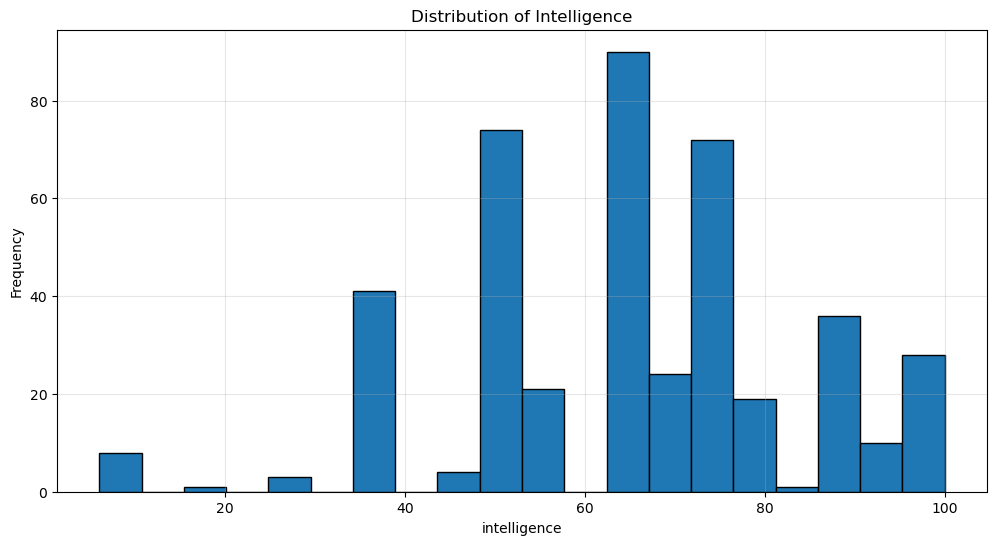

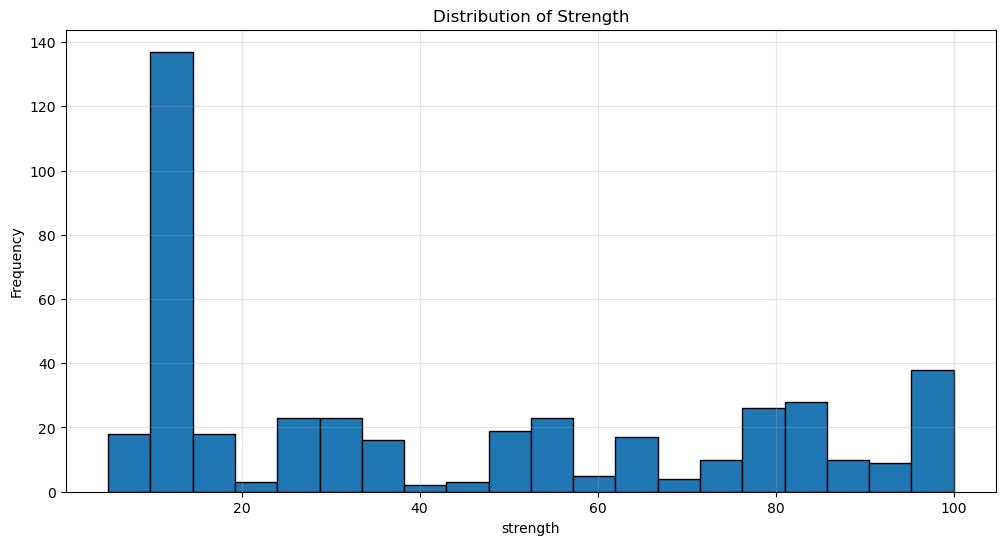

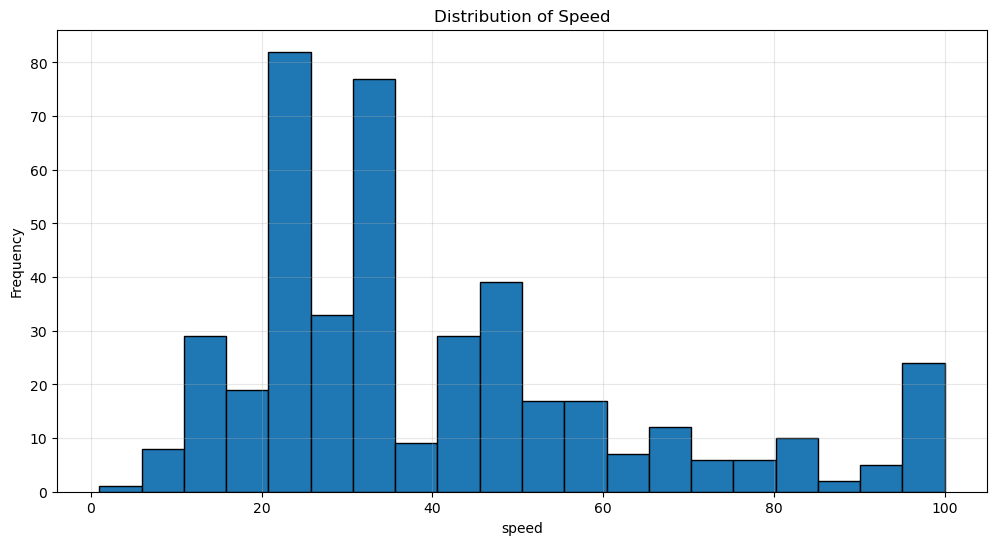

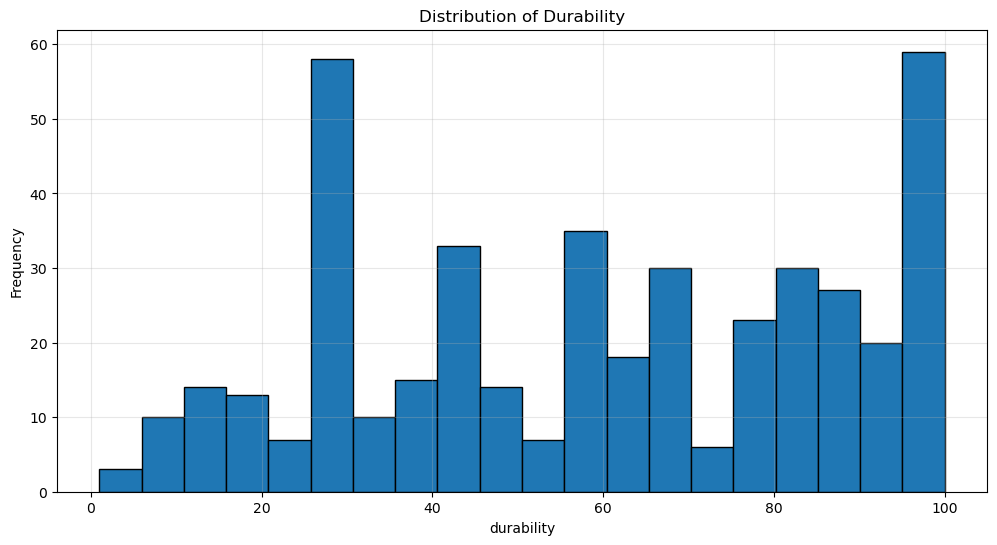

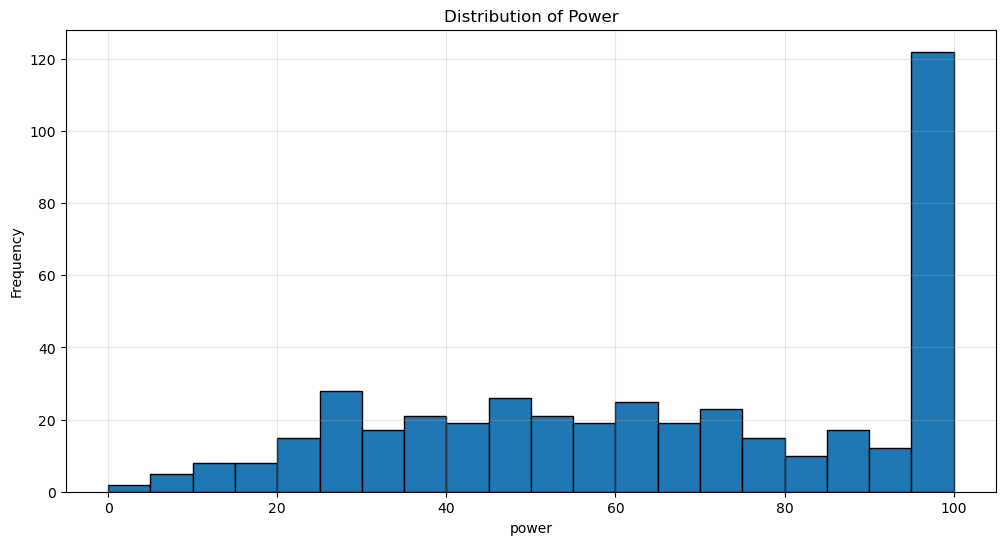

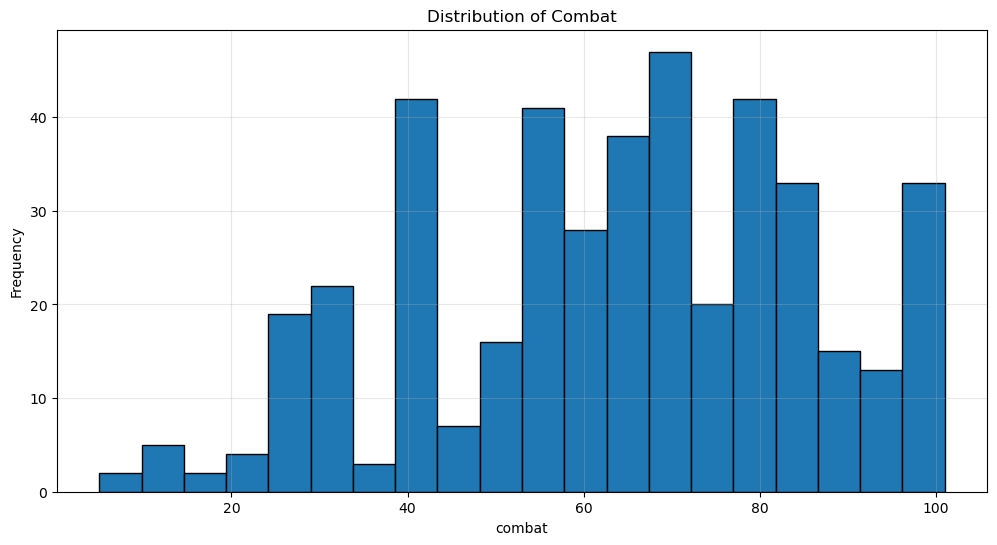

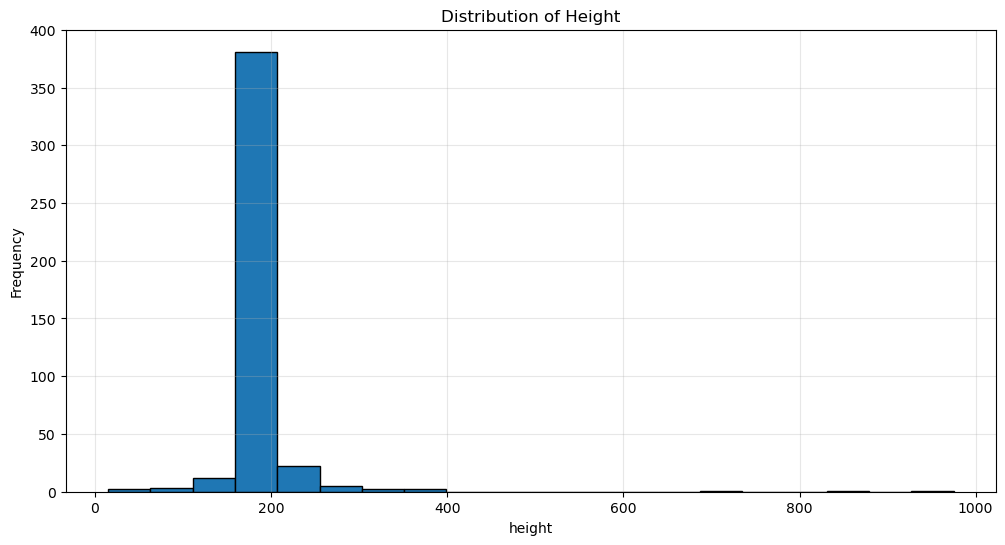

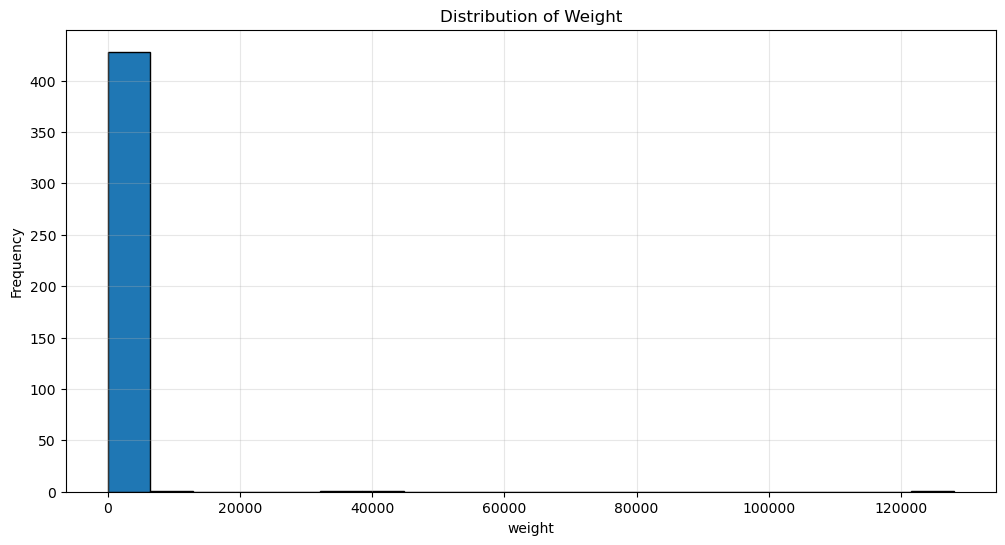

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

# Create individual histograms for each numeric column
numeric_cols = ['intelligence', 'strength', 'speed', 'durability', 
               'power', 'combat', 'height', 'weight']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.hist(super[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

plt.tight_layout()
plt.show()

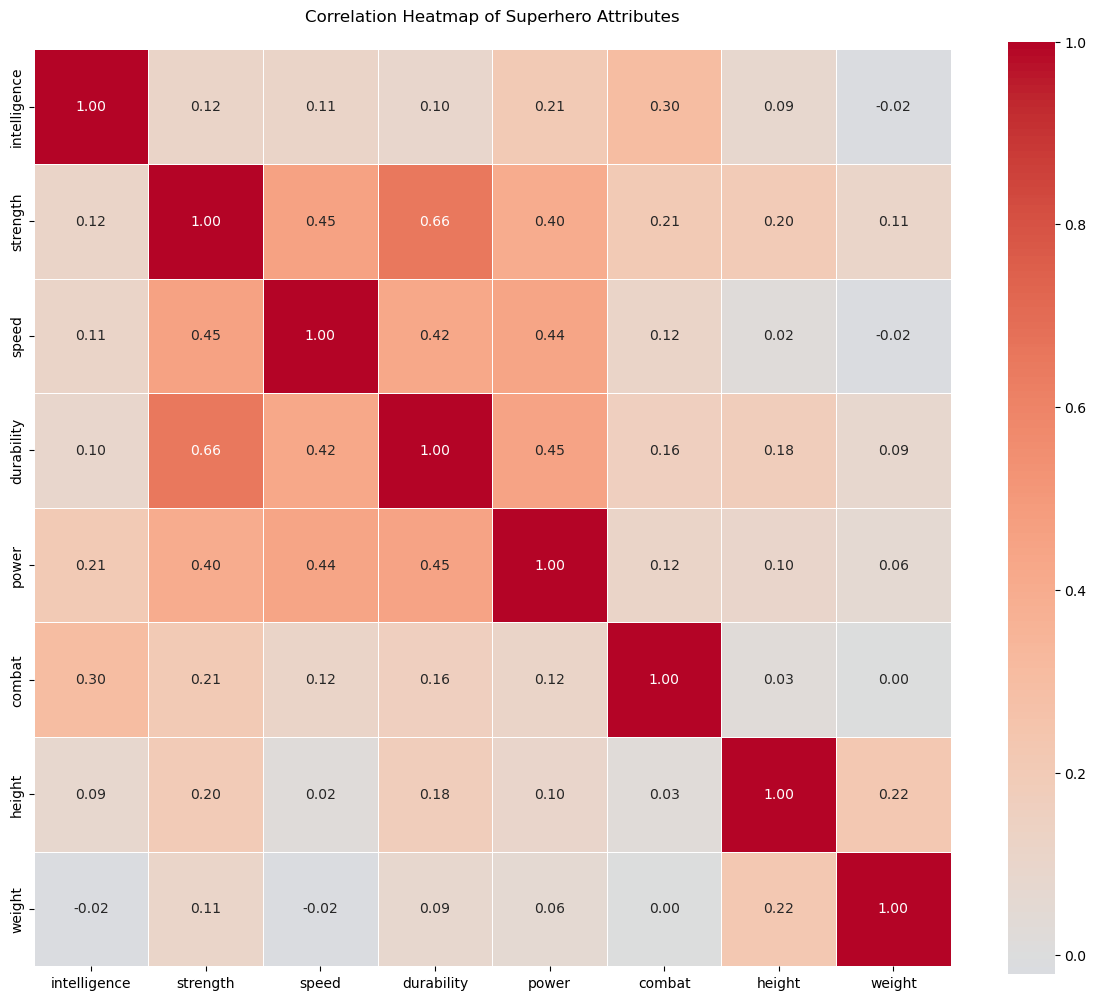

In [27]:
import seaborn as sns

# Select only numeric columns for correlation
numeric_cols = ['intelligence', 'strength', 'speed', 'durability', 
               'power', 'combat', 'height', 'weight']
correlation_matrix = super[numeric_cols].corr()

# Create a larger figure
plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            fmt='.2f',          
            square=True,          
            linewidths=0.5)       

plt.title('Correlation Heatmap of Superhero Attributes', pad=20)
plt.tight_layout()
plt.show()

In [28]:
# List of columns to be processed
columns_to_process = [
    'publisher', 'alignment', 'gender', 'eye-color', 'hair-color'
]

# Loop through each column, split, one-hot encode, and concatenate
for column in columns_to_process:
    data = super[column].str.split(', ', expand=True)
    dummies = pd.get_dummies(data.stack()).groupby(level=0).sum()
    super = pd.concat([super, dummies.add_prefix(f'{column} ')], axis=1)

# Drop original categorical columns
super2 = super.drop(columns=columns_to_process)
super2.head()

,intelligence,strength,speed,durability,power,combat,height,weight,publisher Angel,publisher Angel Salvadore,publisher Ant-Man,publisher Anti-Venom,publisher Anti-Vision,publisher Archangel,publisher Batgirl,publisher Batgirl III,publisher Batman II,publisher Binary,publisher Black Racer,publisher Boom-Boom,publisher DC Comics,publisher Dark Horse Comics,publisher Deadpool,publisher Evil Deadpool,publisher Flash IV,publisher George Lucas,publisher Giant-Man,publisher Goliath,publisher Image Comics,publisher Impulse,publisher Iron Lad,publisher Jean Grey,publisher Marvel Comics,publisher Meltdown,publisher Ms Marvel II,publisher Nightwing,publisher Oracle,publisher Phoenix,publisher Power Man,publisher Power Woman,publisher Red Hood,publisher Red Robin,publisher Robin II,publisher Robin III,publisher Rune King Thor,publisher Scorpion,publisher She-Thing,publisher Shueisha,publisher Sony Pictures,publisher Speed Demon,publisher Spider-Carnage,publisher Spoiler,publisher Star Trek,publisher Superman Prime One-Million,publisher Tempest,publisher Thunderbird II,publisher Toxin,publisher Venom III,publisher Vindicator II,alignment -,alignment bad,alignment good,alignment neutral,gender -,gender Female,gender Male,eye-color -,eye-color Amber,eye-color Black,eye-color Blue,eye-color Blue / White,eye-color Brown,eye-color Gold,eye-color Green,eye-color Green / Blue,eye-color Grey,eye-color Hazel,eye-color Indigo,eye-color Purple,eye-color Red,eye-color Silver,eye-color Violet,eye-color White,eye-color White / Red,eye-color Yellow,eye-color Yellow (without irises),eye-color Yellow / Blue,eye-color blue,eye-color brown,hair-color -,hair-color Auburn,hair-color Black,hair-color Black / Blue,hair-color Blond,hair-color Blue,hair-color Brown,hair-color Brown / White,hair-color Brownn,hair-color Gold,hair-color Green,hair-color Grey,hair-color Indigo,hair-color Magenta,hair-color No Hair,hair-color Orange,hair-color Orange / White,hair-color Pink,hair-color Purple,hair-color Red,hair-color Red / Orange,hair-color Red / White,hair-color Silver,hair-color Strawberry Blond,hair-color White,hair-color Yellow,hair-color black,hair-color blond
0,38,100,17,80,24,64,203,980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88,28,35,65,100,85,191,145,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,50,90,53,64,99,65,185,200,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,63,80,53,90,62,95,203,980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,38,80,25,100,98,64,193,270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
null_counts = super2.isnull().sum().sort_values(ascending = False)
null_counts.head()

intelligence                         0
eye-color Green / Blue               0
eye-color Yellow / Blue              0
eye-color Yellow (without irises)    0
eye-color Yellow                     0
dtype: int64

In [30]:
# Drop boolean values that have less than x number of instances
super2.drop([col for col, val in super2.sum().items() if val < 10], axis=1, inplace=True)
super2.head()

,intelligence,strength,speed,durability,power,combat,height,weight,publisher DC Comics,publisher Dark Horse Comics,publisher Marvel Comics,alignment bad,alignment good,alignment neutral,gender Female,gender Male,eye-color -,eye-color Black,eye-color Blue,eye-color Brown,eye-color Green,eye-color Red,eye-color White,eye-color Yellow,hair-color -,hair-color Auburn,hair-color Black,hair-color Blond,hair-color Brown,hair-color No Hair,hair-color Red,hair-color White
0,38,100,17,80,24,64,203,980,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,88,28,35,65,100,85,191,145,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,50,90,53,64,99,65,185,200,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,63,80,53,90,62,95,203,980,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,38,80,25,100,98,64,193,270,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
super2.drop(columns=['eye-color -', 'hair-color -'], inplace=True)
super2.head()

,intelligence,strength,speed,durability,power,combat,height,weight,publisher DC Comics,publisher Dark Horse Comics,publisher Marvel Comics,alignment bad,alignment good,alignment neutral,gender Female,gender Male,eye-color Black,eye-color Blue,eye-color Brown,eye-color Green,eye-color Red,eye-color White,eye-color Yellow,hair-color Auburn,hair-color Black,hair-color Blond,hair-color Brown,hair-color No Hair,hair-color Red,hair-color White
0,38,100,17,80,24,64,203,980,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,88,28,35,65,100,85,191,145,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,50,90,53,64,99,65,185,200,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,63,80,53,90,62,95,203,980,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,38,80,25,100,98,64,193,270,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
super2.sum().sort_values(ascending=True).head()

eye-color White                10
eye-color Black                10
publisher Dark Horse Comics    11
hair-color Auburn              13
eye-color Yellow               13
dtype: int64

In [33]:
super2.shape

(432, 30)

In [34]:
# Scale all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(super2)

In [35]:
# Calculate inertia for different k values
from sklearn.cluster import KMeans
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

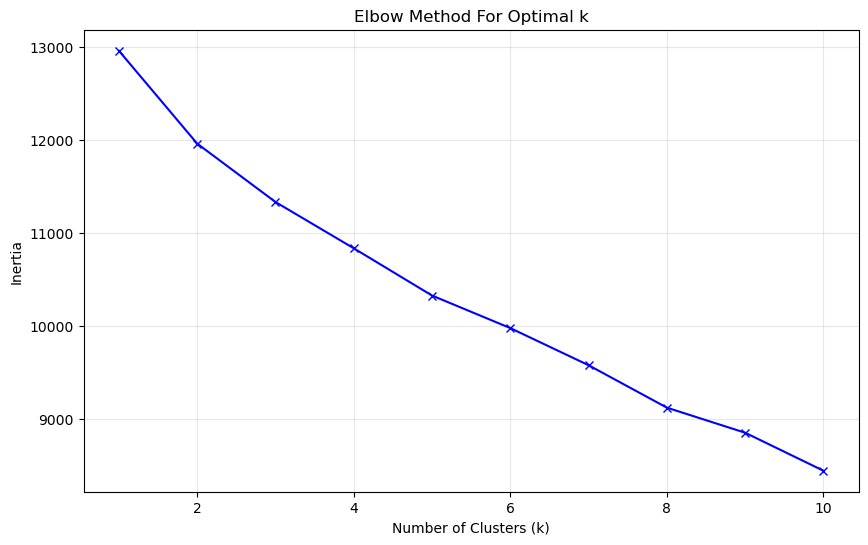

In [36]:
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
# Fit final model with chosen k value
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
super2['Cluster'] = kmeans.fit_predict(X_scaled)

# Numeric characteristics
print("\nNumeric Characteristics by Cluster:")
print(super2.groupby('Cluster')[numeric_cols].mean().round(2))

# Boolean characteristics - show the proportion of each category in each cluster
boolean_cols = [col for col in super2.columns if col not in numeric_cols + ['Cluster']]
print("\nCategory Proportions by Cluster:")
print(super2.groupby('Cluster')[boolean_cols].mean().round(2))

# Cluster sizes
print("\nNumber of heroes per cluster:")
print(super2['Cluster'].value_counts().sort_index())


Numeric Characteristics by Cluster:
         intelligence  strength  speed  durability  power  combat  height   weight
Cluster                                                                           
0               62.24     63.65  51.47       77.18  79.18   66.65  237.41  2579.29
1               68.10     44.49  47.83       63.23  71.07   66.37  182.20   229.38
2               61.97     36.44  36.77       51.22  61.66   62.69  173.37   175.80
3               63.20     31.92  30.51       51.08  50.98   61.44  181.29  1367.06
4               67.91     65.24  49.10       82.69  80.03   64.83  222.60  1135.69

Category Proportions by Cluster:
         publisher DC Comics  publisher Dark Horse Comics  publisher Marvel Comics  alignment bad  alignment good  alignment neutral  gender Female  \
Cluster                                                                                                                                               
0                       0.41                  